In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from wordcloud import WordCloud, STOPWORDS
import imageio
import wordcloud

In [ ]:
# import dataset and preprocess our data
df = pd.read_csv(r"/content/pokemon_gen_1_to_8.csv")
df.drop(columns=['Unnamed: 0','german_name','japanese_name'],inplace=True)
df = df.fillna('/')

In [ ]:
df.head()

,pokedex_number,name,generation,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
0,1,Bulbasaur,1,Normal,Seed Pokémon,2,Grass,Poison,0.7,6.9,2,Overgrow,/,Chlorophyll,318,45,49,49,65,65,45,45,70,64,Medium Slow,2,Grass,Monster,87.5,20,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
1,2,Ivysaur,1,Normal,Seed Pokémon,2,Grass,Poison,1.0,13,2,Overgrow,/,Chlorophyll,405,60,62,63,80,80,60,45,70,142,Medium Slow,2,Grass,Monster,87.5,20,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
2,3,Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.0,100,2,Overgrow,/,Chlorophyll,525,80,82,83,100,100,80,45,70,236,Medium Slow,2,Grass,Monster,87.5,20,1.0,2.0,0.5,0.5,0.25,2.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
3,3,Mega Venusaur,1,Normal,Seed Pokémon,2,Grass,Poison,2.4,155.5,1,Thick Fat,/,/,625,80,100,123,122,120,80,45,70,281,Medium Slow,2,Grass,Monster,87.5,20,1.0,1.0,0.5,0.5,0.25,1.0,0.5,1.0,1.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,0.5
4,4,Charmander,1,Normal,Lizard Pokémon,1,Fire,/,0.6,8.5,2,Blaze,/,Solar Power,309,39,52,43,60,50,65,45,70,62,Medium Slow,2,Dragon,Monster,87.5,20,1.0,0.5,2.0,1.0,0.50,0.5,1.0,1.0,2.0,1.0,1.0,0.5,2.0,1.0,1.0,1.0,0.5,0.5


In [ ]:
 df.groupby(['generation']).count()

,pokedex_number,name,status,species,type_number,type_1,type_2,height_m,weight_kg,abilities_number,ability_1,ability_2,ability_hidden,total_points,hp,attack,defense,sp_attack,sp_defense,speed,catch_rate,base_friendship,base_experience,growth_rate,egg_type_number,egg_type_1,egg_type_2,percentage_male,egg_cycles,against_normal,against_fire,against_water,against_electric,against_grass,against_ice,against_fight,against_poison,against_ground,against_flying,against_psychic,against_bug,against_rock,against_ghost,against_dragon,against_dark,against_steel,against_fairy
generation,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192,192
2,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107,107
3,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165,165
4,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121,121
5,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171,171
6,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85,85
7,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99,99
8,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88,88


In [ ]:
# count numbers of each status corresponding to each generation
df_gen = df.groupby(['generation','status']).count()
df_gen = df_gen.reset_index()
df_gen = df_gen.rename(columns={"name": "number"})
df_gen = df_gen[['generation','status','number']]
df2 = pd.DataFrame([[6,'Sub Legendary',0],[8,'Sub Legendary',0],[8,'Mythical',0]], columns=df_gen.columns)
df_gen = pd.concat([df_gen, df2]).sort_values(by=['generation','status'])

In [ ]:
labels = list(set(df_gen.generation))
Mythical = list(df_gen[df_gen.status=='Mythical']['number'])
Legendary = list(df_gen[df_gen.status=='Legendary']['number'])
Sub_L = list(df_gen[df_gen.status=='Sub Legendary']['number'])
Normal = list(df_gen[df_gen.status=='Normal']['number'])

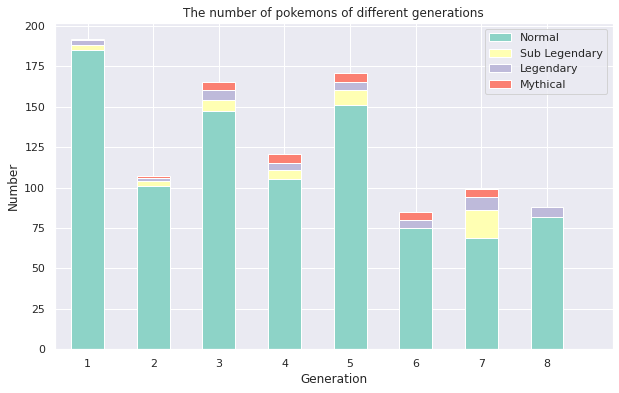

In [ ]:
status={
    "Normal":Normal,
    "Sub Legendary":Sub_L,
    "Legendary":Legendary,
    "Mythical":Mythical
}

from bokeh.palettes import Set3

df_status=pd.DataFrame(status,index=labels)
df_status.plot(kind="bar",stacked=True,figsize=(10,6), color=Set3[4])
#plt.legend(loc="lower left",bbox_to_anchor=(0.8,1.0))
plt.title('The number of pokemons of different generations')
plt.xticks(range(9), labels, rotation=360)
plt.xlabel('Generation')
plt.ylabel('Number')

plt.show()

In [ ]:
species_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.species:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    species_words += " ".join(tokens)+" "

In [ ]:
ability_words = ''
stopwords = set(STOPWORDS)
  
# iterate through the csv file
for val in df.ability_1:
      
    # typecaste each val to string
    val = str(val)
  
    # split the value
    tokens = val.split()
      
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
      
    ability_words += " ".join(tokens)+" "

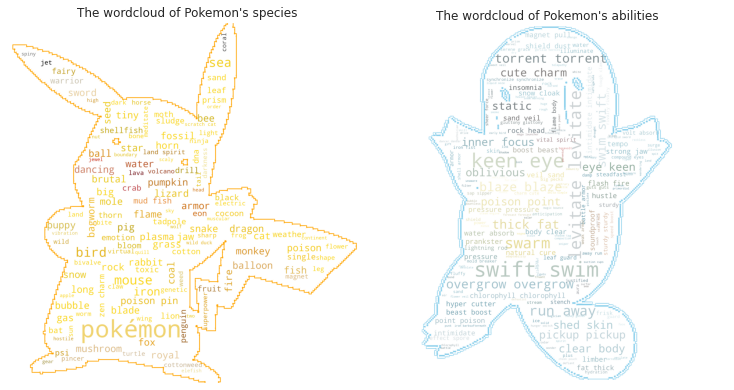

In [ ]:
pika_mask = imageio.imread(r'/content/pika.png')
squirtle_mask = imageio.imread(r'/content/squirtle.png')
w1 = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                scale=10, max_font_size=15, min_font_size=3, 
              contour_width=3, contour_color='orange',
              mask=pika_mask).generate(species_words)
pika_color = wordcloud.ImageColorGenerator(pika_mask)
w1.recolor(color_func=pika_color)

w2 = WordCloud(width = 1000, height = 1000,
                background_color ='white',
                stopwords = stopwords,
                scale=15, max_font_size=15, min_font_size=1, 
              contour_width=3, contour_color='skyblue',
              mask=squirtle_mask).generate(ability_words)
squirtle_color = wordcloud.ImageColorGenerator(squirtle_mask)
w2.recolor(color_func=squirtle_color)

plt.figure(figsize=(10, 12))
# plot the WordCloud image                    
plt.subplot(121)
plt.imshow(w1)
plt.axis("off")
plt.title('The wordcloud of Pokemon\'s species',fontsize=12)

plt.subplot(122)
plt.imshow(w2)
plt.axis("off")
plt.title('The wordcloud of Pokemon\'s abilities',fontsize=12)
plt.tight_layout(pad = 0)
  
plt.show()

In [ ]:
df_type = df.groupby(['type_1']).count()
df_type = df_type.reset_index()
df_type = df_type[['type_1','name']]
df_type = df_type.rename(columns={"name": "number"}).sort_values(by='number', ascending=True)

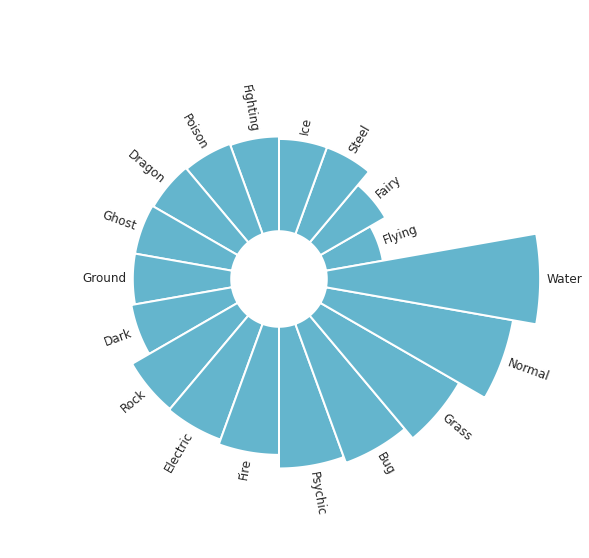

In [ ]:
# initialize the figure
plt.figure(figsize=(20,10))
#plt.suptitle('The distribution of the primary type of the Pokemons', fontsize=16, ha='center')
ax = plt.subplot(111, polar=True)
plt.axis('off')

# Constants = parameters controling the plot layout:
upperLimit = 100
lowerLimit = 30
labelPadding = 4

# Compute max and min in the dataset
max = df_type['number'].max()

# Let's compute heights: they are a conversion of each item value in those new coordinates
# In our example, 0 in the dataset will be converted to the lowerLimit (10)
# The maximum will be converted to the upperLimit (100)
slope = (max - lowerLimit) / max
heights = slope * df_type['number'] + lowerLimit

# Compute the width of each bar. In total we have 2*Pi = 360°
width = 2*np.pi / len(df_type.index)

# Compute the angle each bar is centered on:
indexes = list(range(1, len(df_type.index)+1))
angles = [element * width for element in indexes]
angles

# Draw bars
bars = ax.bar(
    x=angles, 
    height=heights, 
    width=width, 
    bottom=lowerLimit,
    linewidth=2, 
    edgecolor="white",
    color="c",
)

# Add labels
for bar, angle, height, label in zip(bars,angles, heights, df_type["type_1"]):

    # Labels are rotated. Rotation must be specified in degrees :(
    rotation = np.rad2deg(angle)

    # Flip some labels upside down
    alignment = ""
    if angle >= np.pi/2 and angle < 3*np.pi/2:
        alignment = "right"
        rotation = rotation + 180
    else: 
        alignment = "left"

    # Finally add the labels
    ax.text(
        x=angle, 
        y=lowerLimit + bar.get_height() + labelPadding, 
        s=label, 
        ha=alignment, 
        va='center', 
        rotation=rotation, 
        rotation_mode="anchor") 

## Chord diagram

chord diagram of type1 and type2

In [ ]:
!pip install chord
from chord import Chord

In [ ]:
names=['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Dark', 'Poison',
       'Electric', 'Ground', 'Ice', 'Fairy', 'Steel', 'Fighting',
       'Psychic', 'Rock', 'Ghost', 'Dragon', 'Flying']

In [ ]:
df_chord2=df[['type_1','type_2']]
df_chord2['type_2'][df['type_2']=='/'] = df['type_1'][df['type_2']=='/']
df_chord2

,type_1,type_2
0,Grass,Poison
1,Grass,Poison
2,Grass,Poison
3,Grass,Poison
4,Fire,Fire
...,...,...
1023,Fairy,Fairy
1024,Fighting,Steel
1025,Fighting,Fighting
1026,Poison,Dragon


In [ ]:
co_mat = pd.crosstab(df_chord2.type_1, df_chord2.type_2).values.tolist()
pd.DataFrame(co_mat)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,19,0,0,4,2,4,2,14,1,6,2,0,0,12,2,3,7,3
1,0,14,4,0,3,2,3,5,2,0,0,2,5,0,2,0,2,0
2,0,0,12,1,1,2,1,6,3,0,7,3,0,0,4,0,0,0
3,0,2,2,33,2,0,1,6,1,1,0,2,2,3,1,0,4,1
4,0,0,0,0,19,0,0,2,0,0,0,0,0,0,0,0,1,0
5,0,1,0,0,0,28,0,1,1,0,0,1,0,0,3,0,3,0
6,2,1,2,0,0,7,34,7,2,0,3,0,2,0,2,1,1,1
7,0,0,2,0,0,0,0,4,0,0,0,0,0,0,0,0,1,1
8,0,1,2,0,1,0,3,3,14,11,2,0,0,4,0,0,0,0
9,0,3,5,0,5,3,0,7,1,43,1,3,0,15,2,0,3,0


In [ ]:
Chord(co_mat, names, colors="d3.schemeSet2").show()

# Chenkai part

In [ ]:
# The bar chart of Pokemon's height
# We first sort ‘height’ column in descending order.
df[['name','height_m']].sort_values(by='height_m',ascending=False).head(10)

,name,height_m
1027,Eternatus Eternamax,100.0
1026,Eternatus,20.0
380,Wailord,14.5
133,Alolan Exeggutor,10.9
458,Mega Rayquaza,10.8
250,Mega Steelix,10.5
454,Primal Kyogre,9.8
924,Celesteela,9.2
249,Steelix,9.2
124,Onix,8.8


Text(0.5, 1.0, "The distribution of Pokemon's height")

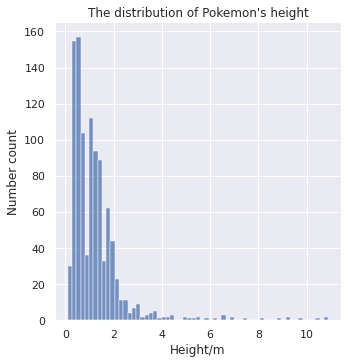

In [ ]:
# Ther are only three Pokemon's height much larger than 10. We neglect them to get the reasonable bar chart
data_height = df.drop(index=df.loc[df['name'].isin(['Eternatus Eternamax','Eternatus','Wailord'])].index,inplace=False)
sns.displot(data=data_height['height_m'])
plt.ylabel("Number count")
plt.xlabel("Height/m")
plt.title("The distribution of Pokemon's height")

In [ ]:
# The bar chart of Pokemon's weight
# We first sort ‘weight’ column in descending order.
data_weight = df.drop(index=df.loc[df['weight_kg']=='/'].index,inplace=False)
data_weight[['name','weight_kg']].sort_values(by='weight_kg',ascending=False).head(10)

,name,weight_kg
924,Celesteela,999.9
917,Cosmoem,999.9
456,Primal Groudon,999.7
1026,Eternatus,950
455,Groudon,950
445,Mega Metagross,942.9
876,Mudsdale,920
926,Guzzlord,888
935,Stakataka,820
939,Melmetal,800


Text(0.5, 1.0, "The distribution of Pokemon's weight")

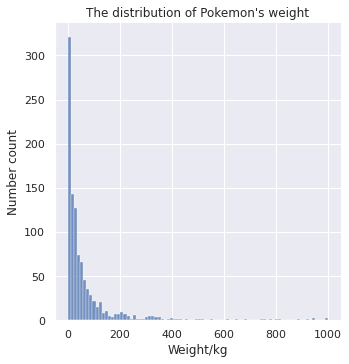

In [ ]:
sns.displot(data=data_weight['weight_kg'])
plt.ylabel("Number count")
plt.xlabel("Weight/kg")
plt.title("The distribution of Pokemon's weight")

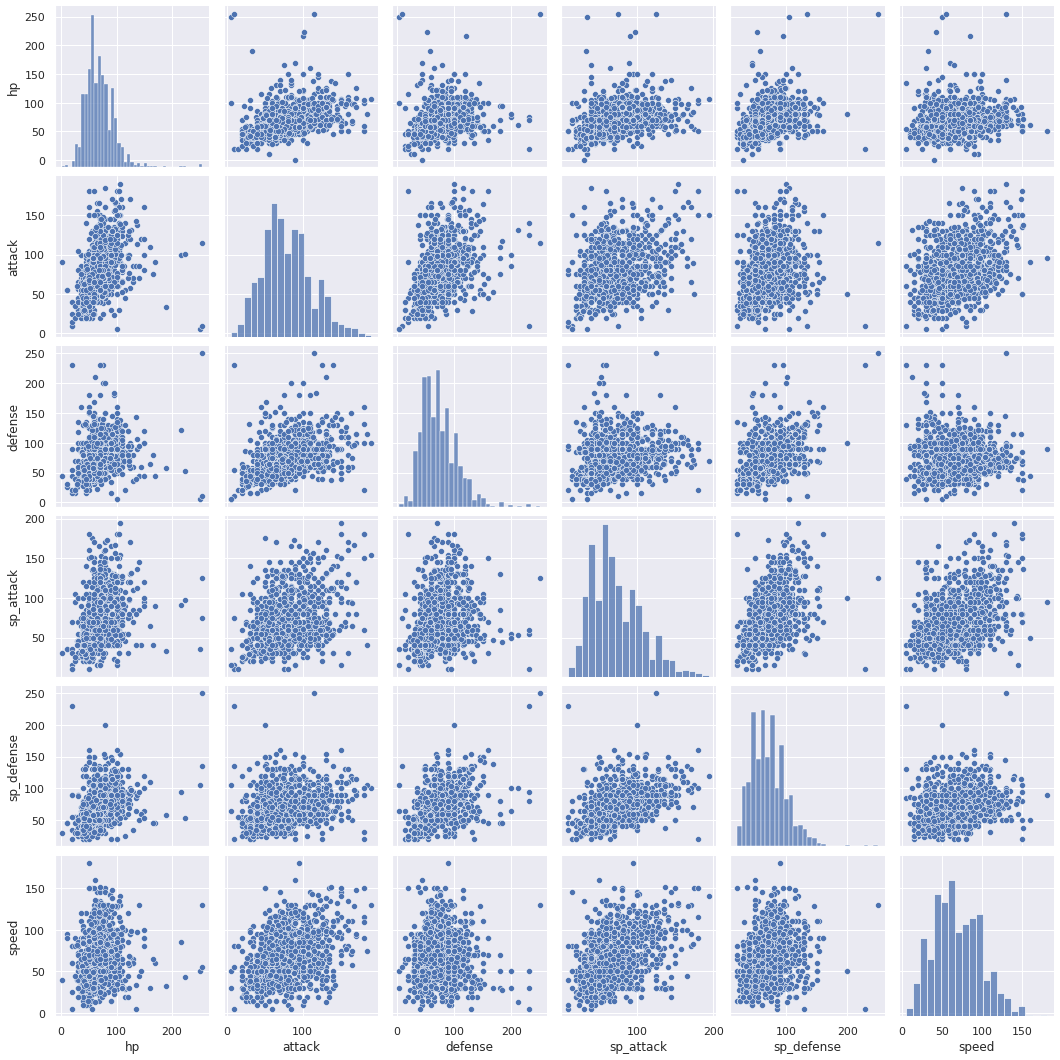

In [ ]:
interested = ['hp','attack','defense','sp_attack','sp_defense','speed']
sns.pairplot(df[interested])

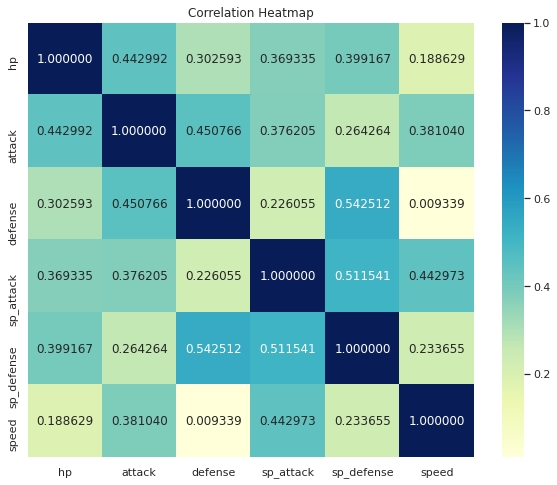

In [ ]:
# Heatmap correlation analysis of 6 features
plt.subplots(figsize=(10,8))
ax = plt.axes()
ax.set_title("Correlation Heatmap")
corr = df[interested].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt="f",cmap="YlGnBu")

In [ ]:
for c in interested:
    df[c] = df[c].astype(float)
df = df.assign(species_strength = df[interested].sum(axis=1)) 
# species_strength 种族值

Text(0.5, 1.0, "Frequency statistics of Pokemon's species strengh")

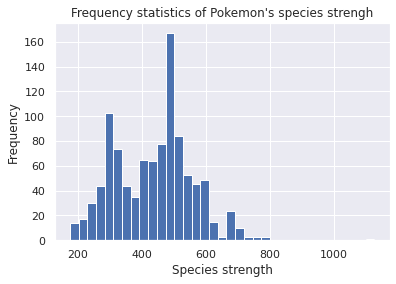

In [ ]:
species_strength = df.species_strength
plt.hist(species_strength,bins=35)
plt.xlabel('Species strength')
plt.ylabel('Frequency')
plt.title("Frequency statistics of Pokemon's species strengh")

In [ ]:
df[['name','species_strength']].sort_values(by='species_strength',ascending=False).head(10)

,name,species_strength
1027,Eternatus Eternamax,1125.0
190,Mega Mewtwo Y,780.0
189,Mega Mewtwo X,780.0
458,Mega Rayquaza,780.0
456,Primal Groudon,770.0
454,Primal Kyogre,770.0
930,Ultra Necrozma,754.0
1024,Zamazenta Crowned Shield,720.0
584,Arceus,720.0
1022,Zacian Crowned Sword,720.0


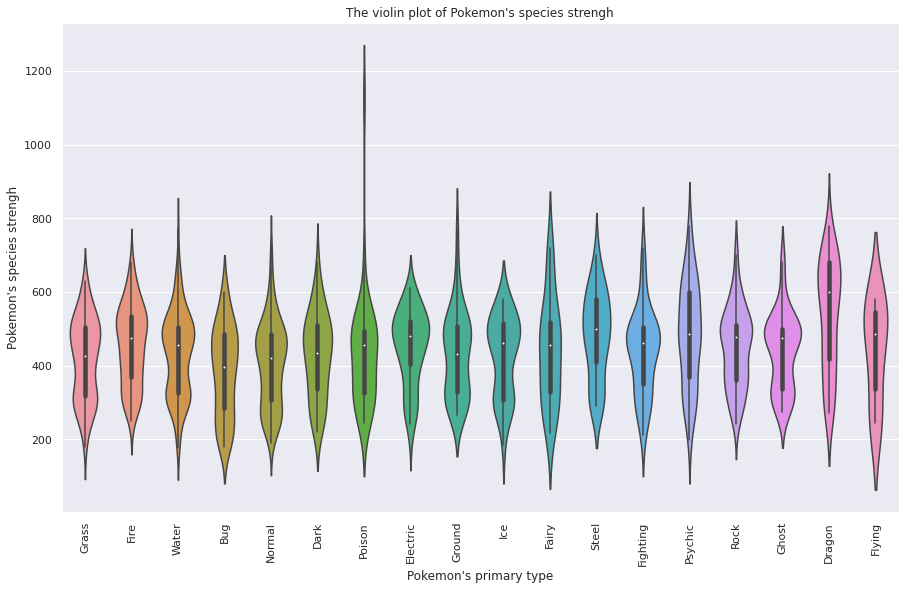

In [ ]:
# The distribution of status in different primary types

# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above) 
sns.set(style="darkgrid")
plt.subplots(figsize=(15,9))
#plt.subplots(figsize=(100,100),dpi='50')
sns.violinplot(x="type_1", y="species_strength", data=df)
plt.xlabel("Pokemon's primary type")
plt.ylabel("Pokemon's species strengh")
plt.xticks(rotation=90) 
plt.title("The violin plot of Pokemon's species strengh")

# palette="muted"
plt.show()